# Projet Simulation et méthodes Monte Carlo - Stratification

### Marina BLAZEVIC, Mehdi EL KACEMY, Samy KOBBITE

### Import des librairies nécessaires

In [62]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import qmc
import itertools
import scipy.stats as stats
import time
import random

### Définition de la fonction f(.)

In [63]:
def f(u):
    d = len(u[0])
    return 1 + np.sin(2*np.pi*(np.sum(u, axis=1)/d - 0.5))


# 1ère partie : Estimation par MC et QMC 



## 1) Estimation par méthode Monte Carlo 

In [64]:
def monte_carlo_integration(d,Ns):
    samples = np.random.uniform(0, 1, size=(Ns,d))
    values = f(samples)
    return np.mean(values)


d = 3
Ns = 100000
result = monte_carlo_integration(d, Ns)
print("La valeur estimée de l'intégrale pour d={} est {:.6f}".format(d, result))

La valeur estimée de l'intégrale pour d=3 est 1.002247


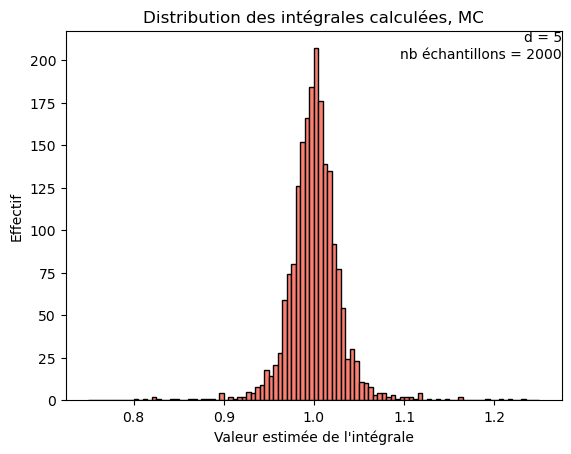

In [65]:
d = 5  # dimension de l'espace d'intégration
Ns = 2000
plt_vals = []

for i in range(Ns):
    result = monte_carlo_integration(d, i+1)
    plt_vals.append(result)

plt.title("Distribution des intégrales calculées, MC")
plt.hist (plt_vals, color = 'salmon', ec="black", bins=100, range=(0.75,1.25)) 
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.text(1.0, 1.0, f'd = {d}\nnb échantillons = {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()

## 2) Estimation par méthode Quasi Monte Carlo

Ici, on va tester deux façons de générer des suites, selon les méthodes de Sobol puis Halton

### 2.1) QMC & Sobol

In [66]:
def quasi_monte_carlo1(d, Ns):
    samples = stats.qmc.Sobol(d).random(Ns)
    values = f(samples)
    return np.mean(values)

d = 5
Ns = 2000
result1 = quasi_monte_carlo1(d, Ns)
print("La valeur estimée de l'intégrale pour d={} est {:.6f}".format(d, result1))

La valeur estimée de l'intégrale pour d=5 est 1.000263


c:\Users\blaze\anaconda3\lib\site-packages\scipy\stats\_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


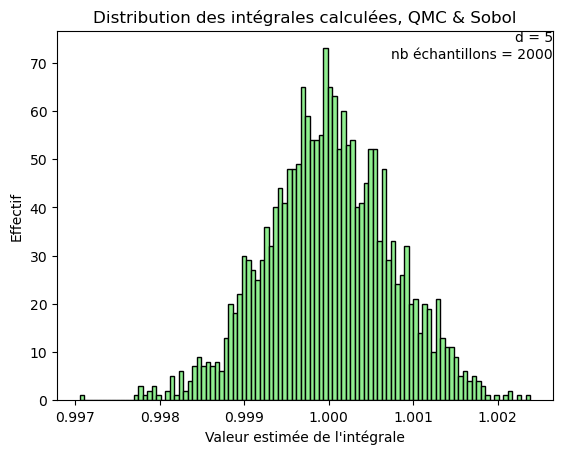

In [67]:
#On stocke toutes les valeurs à tracer
plt_vals = []

for i in range(Ns):
    result = quasi_monte_carlo1(d, Ns=1000)
    plt_vals.append(result)


plt.hist (plt_vals, bins=100, color='lightgreen', edgecolor='black') 
plt.title("Distribution des intégrales calculées, QMC & Sobol")
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.text(1.0, 1.0, f'd = {d}\nnb échantillons = {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show() 

### 2.2) Comparaison entre les deux méthodes (MC, QMC Sobol)

#### 2.2.1) Mean Squared Error

In [68]:
def MSE(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_QMC=0
    for i in range(nb_estimation):
        err_QMC=(1- quasi_monte_carlo1(d,nb_ech))**2
        somme_QMC+=err_QMC
    MSE_QMC=somme_QMC/nb_estimation
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_QMC = "+str(MSE_QMC)
MSE(5,2000,1000)

'MSE_MC = 0.00020699068072466752 et MSE_QMC = 1.7397114022847684e-07'

Pour d = 1, nb_ech = 10000, nb_estimations = 1000: \
'MSE_MC = 5.1693700623336035e-05 et MSE_QMC = 8.652818054142973e-33' \

Pour d = 2, nb_ech = 10000, nb_estimations = 1000: \
'MSE_MC = 5.129406317276329e-05 et MSE_QMC = 2.2707414078034938e-08' \

Pour d = 3, nb_ech = 10000, nb_estimations = 1000: \
'MSE_MC = 4.871579701648471e-05 et MSE_QMC = 2.6646164250900025e-08' \

Pour d = 4, nb_ech = 10000, nb_estimations = 1000: \
'MSE_MC = 4.212261652583748e-05 et MSE_QMC = 2.5143801021226344e-08' 


#### 2.2.2) Intervalles de confiance

In [69]:
def CI(d,nb_estimation):
    MC=f(np.random.uniform(0, 1, size=(nb_estimation,d)))
    halton_seq = qmc.Halton(d)
    samples = halton_seq.random(nb_estimation)
    QMC=f(samples)
    MC_est=monte_carlo_integration(d,nb_estimation)
    QMC_est=quasi_monte_carlo1(d,nb_estimation)
    MC_se=np.std(MC)/np.sqrt(nb_estimation)
    QMC_se=np.std(QMC)/np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    QMC_CI = stats.norm.interval(0.95, loc=QMC_est, scale=QMC_se)
    return "Pour d= "+str(d)+" et nb estimations = "+str(nb_estimation)+", CI_MC = "+str(MC_CI)+" et CI_QMC = "+str(QMC_CI)
CI(5,1000)
    

'Pour d= 5 et nb estimations = 1000, CI_MC = (0.925988134314842, 1.0014452324364904) et CI_QMC = (0.9617274430130607, 1.0382440372067407)'

### 2.3) QMC & Halton 



In [70]:
def quasi_monte_carlo2(d, Ns):
    samples = stats.qmc.Halton(d).random(Ns)
    values = f(samples)
    return np.mean(values)

d = 5
Ns = 2000
result2 = quasi_monte_carlo2(d, Ns)
print("La valeur estimée de l'intégrale pour d={} est {:.6f}".format(d, result2))

La valeur estimée de l'intégrale pour d=5 est 0.999906


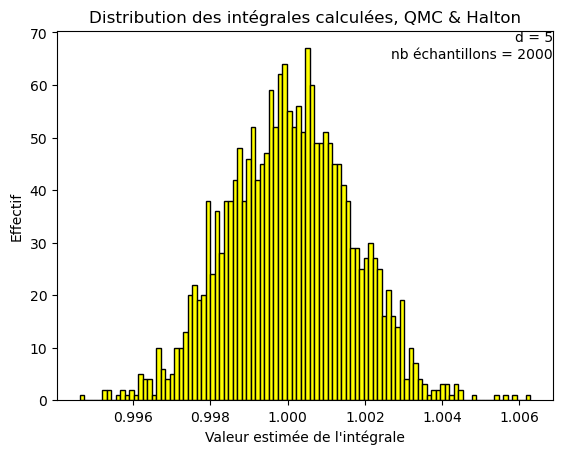

In [71]:
plt_vals = []

for i in range(Ns):
    result = quasi_monte_carlo2(d, Ns=1000)
    plt_vals.append(result)

plt.hist (plt_vals, bins=100, color='yellow', edgecolor='black') 
plt.title("Distribution des intégrales calculées, QMC & Halton")
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.text(1.0, 1.0, f'd = {d}\nnb échantillons = {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show() # shows the plot 

### 2.4) Comparaison entre MC et QMC Halton

##### 2.4.1) Mean Squared Error

In [72]:
def MSE(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_QMC=0
    for i in range(nb_estimation):
        err_QMC=(1- quasi_monte_carlo2(d,nb_ech))**2
        somme_QMC+=err_QMC
    MSE_QMC=somme_QMC/nb_estimation
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_QMC = "+str(MSE_QMC)
MSE(4,10000,1000)

'MSE_MC = 3.8961124461328297e-05 et MSE_QMC = 2.5495717246474452e-08'

#### 2.4.2) Intervalles de confiance

In [73]:
def CI(d,nb_estimation):
    MC=f(np.random.uniform(0, 1, size=(nb_estimation,d)))
    halton_seq = qmc.Halton(d)
    samples = halton_seq.random(nb_estimation)
    QMC=f(samples)
    MC_est=monte_carlo_integration(d,nb_estimation)
    QMC_est=quasi_monte_carlo2(d,nb_estimation)
    MC_se=np.std(MC)/np.sqrt(nb_estimation)
    QMC_se=np.std(QMC)/np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    QMC_CI = stats.norm.interval(0.95, loc=QMC_est, scale=QMC_se)
    return "CI_MC = "+str(MC_CI)+" et CI_QMC = "+str(QMC_CI)
CI(2,10000)
    

'CI_MC = (0.9945506929750069, 1.0222400840944388) et CI_QMC = (0.9861264342615175, 1.0138433342851023)'

### 2.5) Comparaison entre QMC Sobol et QMC Halton

In [74]:
def MSE(d,nb_ech,nb_estimation):
    somme_S=0
    somme_H=0
    for i in range(nb_estimation):
        err_H=(1- quasi_monte_carlo2(d,nb_ech))**2
        somme_H+=err_H
    MSE_H=somme_H/nb_estimation
    for i in range(nb_estimation):
        err_S=(1- quasi_monte_carlo1(d,nb_ech))**2
        somme_S+=err_S
    MSE_S=somme_S/nb_estimation
    return "MSE_S = "+str(MSE_S)+" et MSE_H = "+str(MSE_H)
MSE(5,2000,1000)

'MSE_S = 1.8603095115537357e-07 et MSE_H = 6.477101149102572e-07'

In [75]:
def CI(d,nb_estimation):
    halton_seq = qmc.Halton(d)
    samples = halton_seq.random(nb_estimation)
    QMCH=f(samples)
    sobol_seq = qmc.Sobol(d)
    samples2 = sobol_seq.random(nb_estimation)
    QMCS = f(samples2)
    QMCH_est=quasi_monte_carlo2(d,nb_estimation)
    QMCS_est=quasi_monte_carlo1(d,nb_estimation)
    QMCH_se=np.std(QMCH)/np.sqrt(nb_estimation)
    QMCS_se=np.std(QMCS)/np.sqrt(nb_estimation)
    QMCH_CI = stats.norm.interval(0.95, loc=QMCH_est, scale=QMCH_se)
    QMCS_CI = stats.norm.interval(0.95, loc=QMCS_est, scale=QMCS_se)   
    return "CI_QMCS = "+str(QMCS_CI)+" et CI_QMCH = "+str(QMCH_CI)
CI(2,10000)

'CI_QMCS = (0.9861647511517313, 1.0138798793599808) et CI_QMCH = (0.986067213240775, 1.0137895589182044)'

2.6) Comparaison de la convergence entre MC et QMC

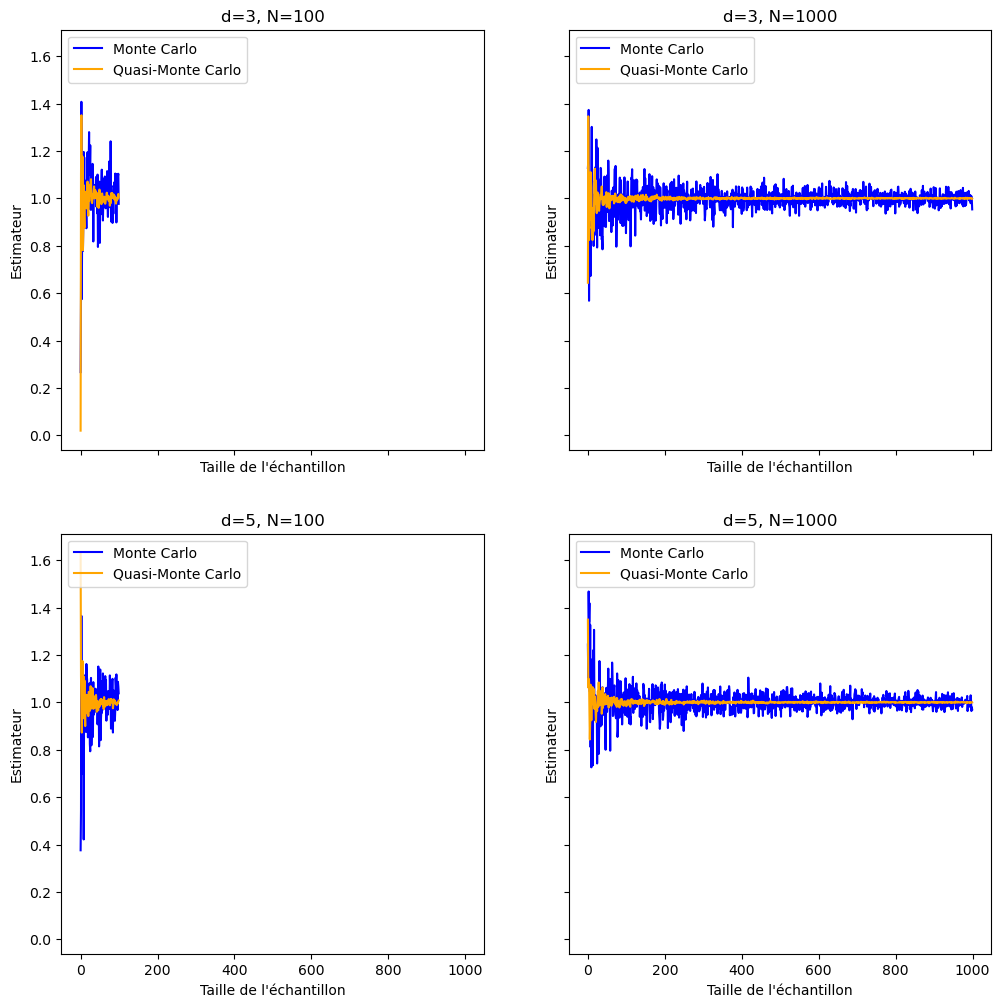

In [76]:
def f(u):
    d = len(u[0])
    return 1 + np.sin(2*np.pi*(np.sum(u,axis=1)/d - 0.5))

def monte_carlo(d, Ns):
    estimates = []
    for N in Ns:
        samples = np.random.uniform(0, 1, size=(N,d))
        values = f(samples)
        estimate = np.mean(values)
        estimates.append(estimate)
    return estimates

def quasi_monte_carlo(d, Ns):
    estimates = []
    for N in Ns:
        samples = stats.qmc.Sobol(d).random(N)
        values = f(samples)
        estimate = np.mean(values)
        estimates.append(estimate)
    return estimates


# limits of integration
a = 0
b = 1
ds = [3, 5]
Ns = [100, 1000]
methods = [monte_carlo, quasi_monte_carlo]
labels = ["Monte Carlo", "Quasi-Monte Carlo"]
colors = ["blue", "orange"]

fig, axs = plt.subplots(len(ds), len(Ns), figsize=(12, 12), sharex=True, sharey=True)

for i, d in enumerate(ds):
    for j, N in enumerate(Ns):
        for k, method in enumerate(methods):
            estimates = method(d, range(1, N+1))
            axs[i, j].plot(estimates, color=colors[k])
            axs[i, j].set_title("d={}, N={}".format(d, N))
            axs[i, j].set_xlabel("Taille de l'échantillon")
            axs[i, j].set_ylabel("Estimateur")
            axs[i, j].legend(labels, loc="upper left")

#plt.tight_layout()
#plt.show()


# 2ème partie : Implémentation des estimateurs d'ordre 1 et 2 d'Haber


## 1) Estimateur d'Haber d'ordre 1 

In [77]:

def f(u):
    d = len(u)
    return 1 + np.sin(2*np.pi*(np.sum(u)/d - 0.5))

In [78]:
r = 1
m = 0
s = 9

def C(k, s):
    C = []  # Liste pour stocker les ensembles ((2j1+1)/2k, ..., (2js+1)/2k)

    for j in itertools.product(range(k), repeat=s):
        Cj = [(2*j[i]+1)/(2*k) for i in range(s)]
        C.append(tuple(Cj))

    return C




In [79]:
s = 3
k = 4

def haber_ordre1(N):
    n = k**s
    estimates = []
    for _ in range(N):
        Uc = [random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
        I = 0
        for c in C(k, s):
            I += f(tuple(ci + ui for ci, ui in zip(c, Uc)))
        I /= n
        estimates.append(I)
    return estimates

In [80]:
#C(3, s)

## 2.2 : Estimateur d'Haber d'ordre 2

In [81]:
#def gc0(u,f) :  
#  g = (f(c+u) + f(c - u)) / 2

def gc(u, c, f):
    g = (f(tuple(ci + ui for ci, ui in zip(c, u))) + f(tuple(ci - ui for ci, ui in zip(c, u)))) / 2
    return g



def haber_ordre2( N):
    n = 2*k**s
    estimates = []
    for _ in range(N):
        Uc = [random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
        I = 0
        for c in C(k, s):
            I += gc(Uc, c, f)
        I /= n
        estimates.append(I)
    return estimates

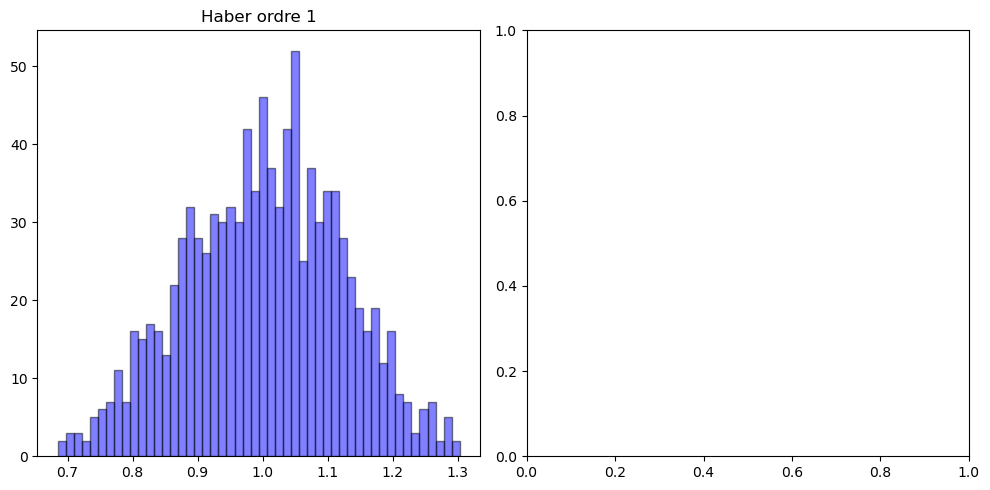

In [100]:


# Paramètres
d = 2
s = 4
k = 5
N = 1000

# Estimation avec Haber ordre 1
estimates1 = haber_ordre1(N)

# Estimation avec Haber ordre 2
#estimates2 = haber_ordre2( N)

# Création des sous-graphiques
fig, axs = plt.subplots(1,2, figsize=(10, 5))

# Affichage de l'histogramme pour Haber ordre 1
axs[0].hist(estimates1, bins=50, alpha=0.5, color='blue', edgecolor='black')
axs[0].set_title('Haber ordre 1')

# Affichage de l'histogramme pour Haber ordre 2
#axs[1].hist(estimates2, bins=50, alpha=0.5, color='red', edgecolor='black')
#axs[1].set_title('Haber ordre 2')

# Affichage de la figure
plt.tight_layout()
plt.show()

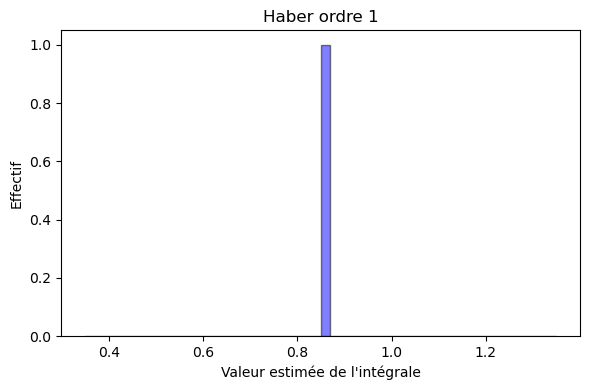

In [96]:
# Paramètres
s = 4
k = 5
Ns = 1000

# Estimation avec Haber ordre 1
estimates1 = haber_ordre1(Ns)

# Création du sous-graphique
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

# Affichage de l'histogramme pour Haber ordre 1
axs.hist(estimates1[0], bins=50, alpha=0.5, color='blue', edgecolor='black')
axs.set_title('Haber ordre 1')

# Ajout des labels d'axes et du texte
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")


# Affichage de la figure
plt.tight_layout()
plt.show()


### 4) Comparaison entre les différentes méthodes

In [83]:
def monte_carlo_integration(d, num_samples):
    samples = np.random.rand(num_samples, d)
    values = f(samples)
    return np.mean(values)

def quasi_monte_carlo(d, num_samples):
    samples = stats.qmc.Sobol(d).random(num_samples)
    values = f(samples)
    return np.mean(values)


### 4.1) Mean Squared Error

In [84]:
#def MSE2(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_QMC=0
    somme_haber1=0
    somme_haber2=0
    for i in range(nb_estimation):
        err_QMC=(1- quasi_monte_carlo(d,nb_ech))**2
        somme_QMC+=err_QMC
    MSE_QMC=somme_QMC/nb_estimation
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    for i in range(nb_estimation):
        err_haber1=(1- haber_ordre1(nb_ech))**2
        somme_haber1+=err_haber1
    MSE_haber1=somme_haber1/nb_estimation
    for i in range(nb_estimation):
        err_haber2=(1- haber_ordre2(nb_ech))**2
        somme_haber2+=err_haber2
    MSE_haber2=somme_haber2/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_QMC = "+str(MSE_QMC)+" et MSE_haber1 = "+str(MSE_haber1)+" et MSE_haber2 = "+str(MSE_haber2)
MSE2(2,1000,1000)

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [ ]:
#MSE2(3,1000,1000)

'MSE_MC = 0.0004709452204028932 et MSE_QMC = 6.934109304682035e-07 et MSE_haber1 = 7.013170294161744e-07 et MSE_haber2 = 6.896343522594065e-07'

In [ ]:
#MSE2(4,1000,1000)

'MSE_MC = 0.00043003938326384206 et MSE_QMC = 5.679832269120855e-07 et MSE_haber1 = 5.81116516556035e-07 et MSE_haber2 = 6.308298885007946e-07'

In [ ]:
#MSE2(5,1000,1000)

'MSE_MC = 0.00035503811097367205 et MSE_QMC = 5.300630204915648e-07 et MSE_haber1 = 5.538802718818352e-07 et MSE_haber2 = 5.347692536150533e-07'

### 4.2) Intervalles de confiance

In [ ]:

def CI_MC_1(k, s, nb_estimation):
    def f(x):
        return np.exp(-(sum((x[i]-m)**2 for i in range(s)))/s/(2*r**2))

    def monte_carlo_integration_1(s, nb_estimation):
        X = np.random.normal(m, r, size=(nb_estimation, s))
        return np.mean(f(X))

    MC_est = monte_carlo_integration_1(s, nb_estimation)
    MC_se = np.std(f(np.random.normal(m, r, size=(nb_estimation, s)))) / np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    return "CI_MC_1 = " + str(MC_CI)



def gc(c, u, f):
    return (f(np.array(c)+np.array(u)) + f(np.array(c)-np.array(u))) / 2

def monte_carlo_integration_2(s, k, nb_estimation, f):
    n = 2*k**s
    I = 0
    for c in C(k, s):
        Uc = [np.random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
        I += gc(c, Uc, f)
    I = I / n
    return I

def CI_MC_2(k, s, nb_estimation):
    def f(x):
        return np.exp(-(sum((x[i]-m)**2 for i in range(s)))/s/(2*r**2))

    MC_est = monte_carlo_integration_2(s, k, nb_estimation, f)
    MC_se = np.std([monte_carlo_integration_2(s, k, nb_estimation, f) for _ in range(10)]) / np.sqrt(nb_estimation)
    MC_CI = stats.norm.interval(0.95, loc=MC_est, scale=MC_se)
    return "CI_MC_2 = " + str(MC_CI)

CI_MC_1(2,5,10000) , CI_MC_2(2,5,10000)

('CI_MC_1 = (0.799285130773405, 0.8036678667799679)',
 'CI_MC_2 = (0.4242133719385901, 0.4242266113701577)')

### 5) Code pour la comparaison des vitesses

In [89]:
k= 2
s= 2
d= 2
Ns = 10000

start_time = time.time()
resultat_1 = monte_carlo_integration(d, Ns)
end_time = time.time()
temps_execution_1 = end_time - start_time
print("L'algorithme monte_carlo_integration a pris", temps_execution_1, "secondes pour s'exécuter.")


start_time = time.time()
resultat_2 = quasi_monte_carlo(d, Ns)
end_time = time.time()
temps_execution_2 = end_time - start_time
print("L'algorithme quasi_monte_carlo a pris", temps_execution_2, "secondes pour s'exécuter.")


start_time = time.time()
resultat_3 = haber_ordre1( Ns)
end_time = time.time()
temps_execution_3 = end_time - start_time
print("L'algorithme haber_ordre1 a pris", temps_execution_3, "secondes pour s'exécuter.")

# Mesurer le temps d'exécution de l'algorithme haber_order2_integration
#start_time = time.time()
#resultat_4 = haber_ordre2(Ns)
#end_time = time.time()
#temps_execution_4 = end_time - start_time
#print("L'algorithme haber_ordre2_integration a pris", temps_execution_4, "secondes pour s'exécuter.")



L'algorithme monte_carlo_integration a pris 0.001999378204345703 secondes pour s'exécuter.
L'algorithme quasi_monte_carlo a pris 0.003002166748046875 secondes pour s'exécuter.
L'algorithme haber_ordre1 a pris 0.4043452739715576 secondes pour s'exécuter.


### 6) Tracé des boxplots pour visualiser l'erreur numérique

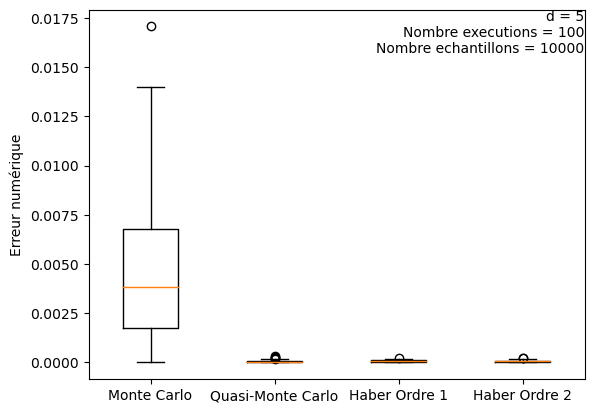

In [ ]:
d = 5
Ns = 10000

# Exécuter chaque algorithme plusieurs fois pour obtenir une distribution d'estimations
n_runs = 100
estimations_1 = [monte_carlo_integration(d, Ns) for _ in range(n_runs)]
estimations_2 = [quasi_monte_carlo(d, Ns) for _ in range(n_runs)]
estimations_3 = [haber_ordre1_integration(d, Ns) for _ in range(n_runs)]
#estimations_4 = [haber_ordre2_integration(d, Ns) for _ in range(n_runs)]

# Calculer l'erreur numérique de chaque algorithme en comparant chaque estimation à la vraie valeur de l'intégrale
vraie_valeur = 1
erreurs_1 = [abs(estimation - vraie_valeur) for estimation in estimations_1]
erreurs_2 = [abs(estimation - vraie_valeur) for estimation in estimations_2]
erreurs_3 = [abs(estimation - vraie_valeur) for estimation in estimations_3]
#erreurs_4 = [abs(estimation - vraie_valeur) for estimation in estimations_4]

# Créer un boxplot pour chaque algorithme
plt.boxplot([erreurs_1, erreurs_2, erreurs_3])
plt.xticks([1, 2, 3], ['Monte Carlo', 'Quasi-Monte Carlo', 'Haber Ordre 1'])
plt.ylabel('Erreur numérique')
plt.text(1.0, 1.0, f'd = {d}\nNombre executions = {n_runs}\nNombre echantillons = {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()


In [ ]:
d 

5

# 3. Réponse à la question par Importance Sampling

In [ ]:
def f(u):
    d = len(u)
    return 1 + np.sin(2*np.pi*((1/d)*np.sum(u) - 1/2))

def g(u):
    return np.prod(u >= 0) * np.prod(u <= 1)

N = 1000000
samples = np.random.uniform(size=(N, d))
weights = np.array([f(u)/g(u) for u in samples])
estimate = np.mean(weights)

print("L'estimateur de l'intégrale vaut", estimate)

L'estimateur de l'intégrale vaut 1.0005694172884043


In [ ]:
def imps(d,Ns):
    samples = np.random.uniform(size=(N, d))
    weights = np.array([f(u)/g(u) for u in samples])
    estimate = np.mean(weights)
    return estimate



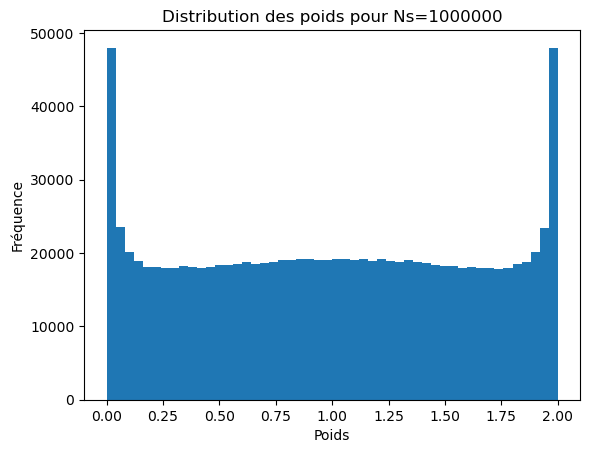

In [ ]:
plt.hist(weights, bins=50)
plt.title("Distribution des poids pour Ns=1000000")
plt.xlabel("Poids")
plt.ylabel("Fréquence")
plt.show()

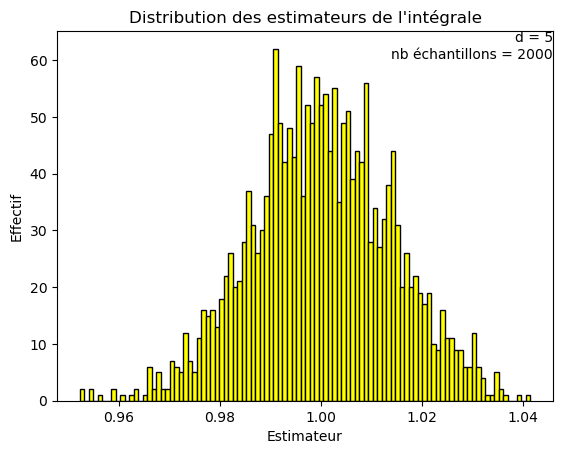

In [ ]:


Ns = 2000 # nombre de simulations
plt_vals = []

for i in range(Ns):
    # Calculer les poids et l'estimateur de l'intégrale
    N = 2000
    samples = np.random.uniform(size=(N, d))
    weights = np.array([f(u)/g(u) for u in samples])
    estimate = np.mean(weights)
    plt_vals.append(estimate)

# Tracer la distribution des estimateurs
plt.hist(plt_vals, bins=100, color='yellow', edgecolor='black')
plt.title("Distribution des estimateurs de l'intégrale")
plt.xlabel("Estimateur")
plt.ylabel("Effectif")
plt.text(1.0, 1.0, f'd = {d}\nnb échantillons = {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
plt.show()


In [ ]:
def MSE(d,nb_ech,nb_estimation):
    somme_MC=0
    somme_IS=0
    for i in range(nb_estimation):
        err_MC=(1- monte_carlo_integration(d,nb_ech))**2
        somme_MC+=err_MC
    MSE_MC=somme_MC/nb_estimation
    for i in range(nb_estimation):
        err_IS=(1- imps(d,nb_ech))**2
        somme_IS+=err_IS
    MSE_IS=somme_IS/nb_estimation
    return "MSE_MC = "+str(MSE_MC)+" et MSE_IS = "+str(MSE_IS)
MSE(5,2000,1000)

'MSE_MC = 0.008322030942203806 et MSE_IS = 0.000358597053170819'

In [ ]:
d= 10
Ns = 10000

start_time = time.time()
resultat_1 = monte_carlo_integration(d, Ns)
end_time = time.time()
temps_execution_1 = end_time - start_time
print("L'algorithme monte_carlo_integration a pris", temps_execution_1, "secondes pour s'exécuter.")


start_time = time.time()
resultat_2 = imps(d, Ns)
end_time = time.time()
temps_execution_2 = end_time - start_time
print("L'algorithme importance sampling a pris", temps_execution_2, "secondes pour s'exécuter.")

L'algorithme monte_carlo_integration a pris 0.01849532127380371 secondes pour s'exécuter.
L'algorithme importance sampling a pris 0.05063223838806152 secondes pour s'exécuter.


Problème en adaptant pour les boxplots 

In [ ]:
d = 5
Ns = 1000

# Exécuter chaque algorithme plusieurs fois pour obtenir une distribution d'estimations
#n_runs = 100
#estimations_1 = [monte_carlo_integration(d, Ns) for _ in range(n_runs)]
#estimations_2 = [quasi_monte_carlo(d, Ns) for _ in range(n_runs)]
#estimations_3 = [haber_ordre1_integration(d, Ns) for _ in range(n_runs)]
#estimations_4 = [haber_ordre2_integration(d, Ns) for _ in range(n_runs)]
#estimations_5 = [imps(d, Ns) for _ in range(n_runs)]

# Calculer l'erreur numérique de chaque algorithme en comparant chaque estimation à la vraie valeur de l'intégrale
vraie_valeur = 1
#erreurs_1 = [abs(estimation - vraie_valeur) for estimation in estimations_1]
#erreurs_2 = [abs(estimation - vraie_valeur) for estimation in estimations_2]
#erreurs_3 = [abs(estimation - vraie_valeur) for estimation in estimations_3]
#erreurs_4 = [abs(estimation - vraie_valeur) for estimation in estimations_4]
#erreurs_5 = [abs(estimation - vraie_valeur) for estimation in estimations_5]
# Créer un boxplot pour chaque algorithme
#plt.boxplot([erreurs_1, erreurs_2, erreurs_3, erreurs_4, erreurs_5])
#plt.xticks([1, 2, 3, 4,5], ['Monte Carlo', 'Quasi-Monte Carlo', 'Haber Ordre 1', 'Haber Ordre 2', 'Importance Sampling'])
#plt.ylabel('Erreur numérique')
#plt.text(1.0, 1.0, f'd = {d}\nNombre executions = {n_runs}\nNombre echantillons = {Ns}', ha='right', va='top', transform=plt.gca().transAxes)
#plt.show()